# CSI 4142 Exploratory Data Analysis - Heart Failure Prediction Dataset

| Name          | Student Number    | Group |
|:-------------:|:-----------------:|:-----:|
| Arda Barak    | 300129340         | 90    |



In [1]:
try:
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

except ImportError:
    %pip install pandas
    %pip install seaborn 
    %pip install matplotlib 

    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

sns.set_style("darkgrid")

## 2. Introduction 

Heart diseases remain one of the leading causes of death across communities, where early detections and high performance risk assesments can be the line between life and death for many people that may not even show any symptoms. This report explores the *Heart Failure Prediction Dataset*, which aims to identify key patterns  and relations between the patient data and heart disease indications.
The main goal of this analysis is to uncover some patterns that can help in early detection of heart diseases by examining various factors of the individuals visiting their health facilities, where making the informed decisions by healthcare professionals could prevent risks in the patients health.
This report is intended to reach medical researchers, healthcare professionals, and cardiologists who seek data driven insights for improving the medical field in terms of further improving the assesment accuracies of the patients.


# 3. A description of the dataset
Basic Description
|Title  |Description|
|:------|:----------|
|Dataset name                   |  Heart Failure Prediction Dataset |
|Author                         |  fedesoriano |
|Further info about the author  |  ("Data Scientist at Kaggle",   "Madrid, Community of Madrid, Spain",    "Joined 4 years ago · last seen a year ago") |
|Purpose                        |  The dataset is created for research purposes, it's created using a combination of 5 different datasets by joining over 11 common features making it a large heart disease dataset |
|Shape                          |  (918, 12) |

A list of the features + descriptions (what do they represent and are they categorical or numerical)  
|Attribute      | Description                               |Type                        |
|:--------------|:------------------------------------------|:---------------------------|
|Age	        |  age of the patient in years              | Numerical |
|Sex	        |  sex of the patient (M: Male, F: Female)  | Categorical   |
|ChestPainType	|  chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic) | Categorical   |
|RestingBP	    |  resting blood pressure (mm Hg)           | Numerical |
|Cholesterol	|  serum cholesterol      (mm/dl)           | Numerical |
|FastingBS	    |  fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise)                                      | Numerical |
|RestingECG	    |  resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] | Categorical |
|MaxHR	        |  maximum heart rate achieved (Numeric value between 60 and 202)                                       | Numerical |
|ExerciseAngina	|  exercise-induced angina (Y: Yes, N: No)  | Categorical   |
|Oldpeak	    |  oldpeak = ST (Numeric value measured in depression)                                                  | Numerical |
|ST_Slope	    |  the slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping)             | Categorical   |
|HeartDisease   |  output class (1: heart disease, 0: Normal)                                                           | Numerical    |




In [2]:
# https://raw.githubusercontent.com/ardabarak/4142/refs/heads/main2/heart.csv
heartDatasetURL =      "https://raw.githubusercontent.com/ardabarak/4142/refs/heads/main2/heart.csv"

heartDS = pd.read_csv(heartDatasetURL)
print(heartDS.shape)
heartDS.head()

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# checking missing values for each column
print("Missing value of columns: ", heartDS.isnull().sum())

# and the duplicated rows
print("Duplicate number of rows: ", heartDS.duplicated().sum())

Missing value of columns:  Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
Duplicate number of rows:  0


In [4]:
# describing the dataset for the numerical variables
heartDS.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<!--    *   *   *   *   *   *   *   *   *   *   *   *   *   *   *   *   *   *       -->

### R1

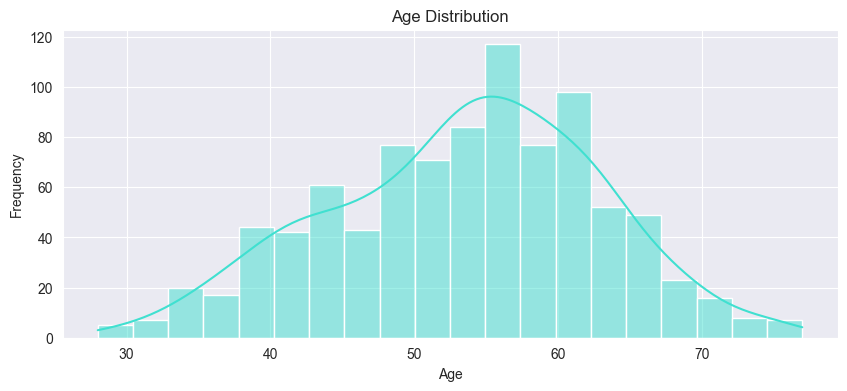

In [5]:
# checking for the Univariate Analysis for r1, r2, r3 below

# r1
plt.figure(figsize=(10,4))
sns.histplot(heartDS['Age'], bins=20, kde=True, color='turquoise')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### R2

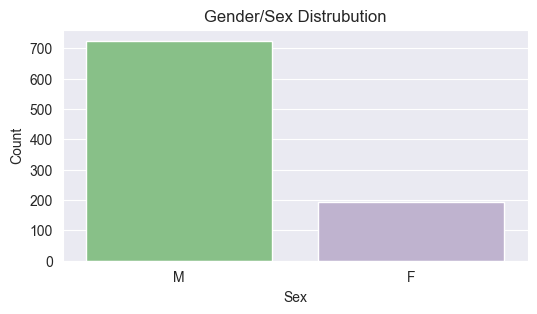

In [6]:
# r2
plt.figure(figsize=(6,3))
sns.countplot(x='Sex', data=heartDS, hue='Sex', palette='Accent')
plt.title('Gender/Sex Distrubution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

### R3

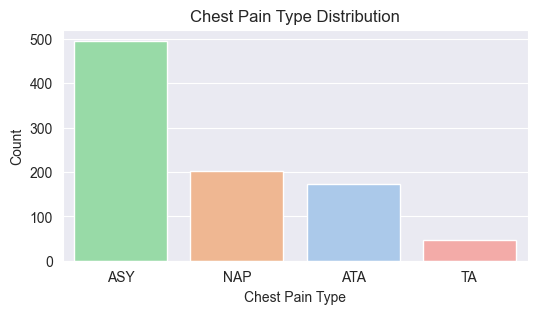

In [7]:
# r3
plt.figure(figsize=(6,3))
sns.countplot(x='ChestPainType', data=heartDS, order=heartDS['ChestPainType'].value_counts().index, hue='ChestPainType', palette='pastel')
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

# checked for the Chest Pain Type Distribution grouped accross the 4 different pain types as: ASY, NAP, ATA, TA

### R4

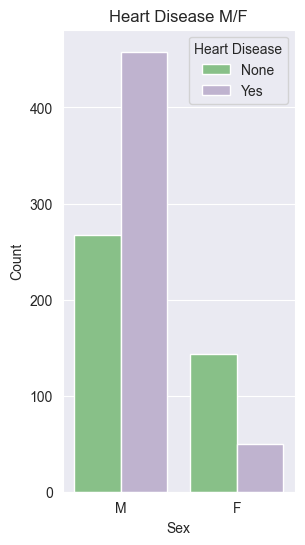

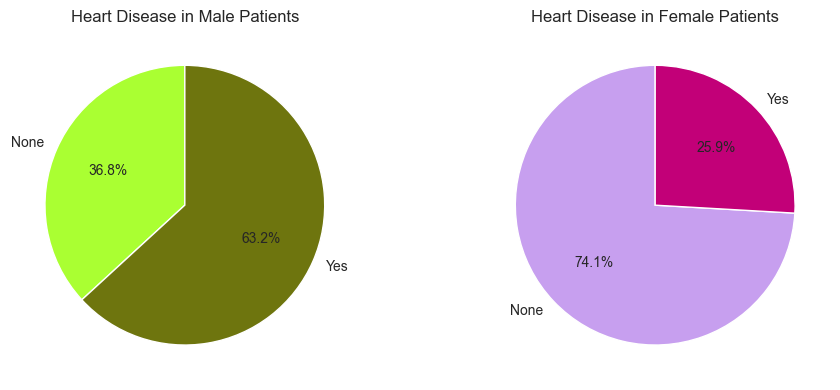

In [8]:
#Bivariate Analysis for r4, r5, r6, r7 below

# r4
plt.figure(figsize=(3,6))
sns.countplot(x='Sex', hue='HeartDisease', data=heartDS, palette="Accent")
plt.title('Heart Disease M/F')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['None', 'Yes'])
plt.show()

#separating by gender to better view heart disease across both genders on their own data
sex_heart = heartDS.groupby(['Sex', 'HeartDisease']).size().unstack()
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
labels = ['None', 'Yes']
colorsM = ['#AAFF32', '#6E750E'] ##01153E > too dark to read..
colorsF = ['#C79FEF', '#C20078']
# Males
axes[0].pie(sex_heart.loc['M'], labels=labels, autopct='%1.1f%%', colors=colorsM, startangle=90)
axes[0].set_title("Heart Disease in Male Patients")
# Females
axes[1].pie(sex_heart.loc['F'], labels=labels, autopct='%1.1f%%', colors=colorsF, startangle=90)
axes[1].set_title("Heart Disease in Female Patients")
plt.tight_layout()
plt.show()

### R5

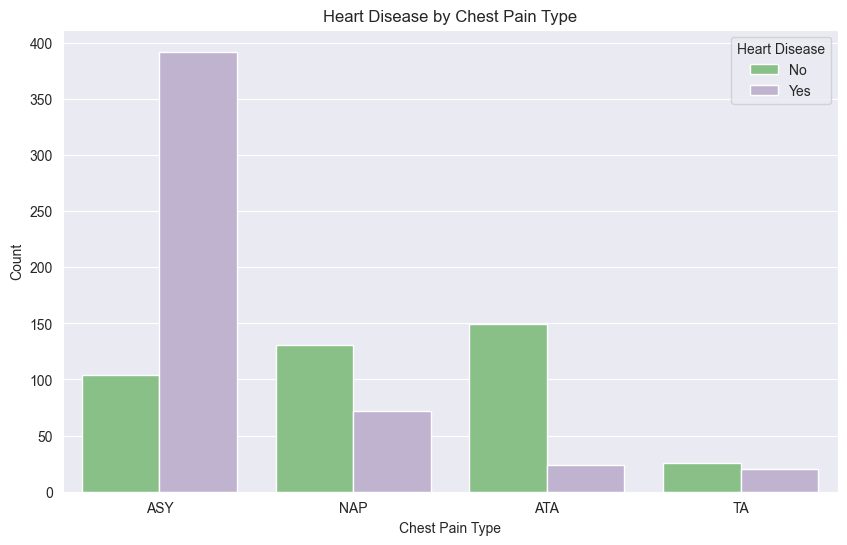

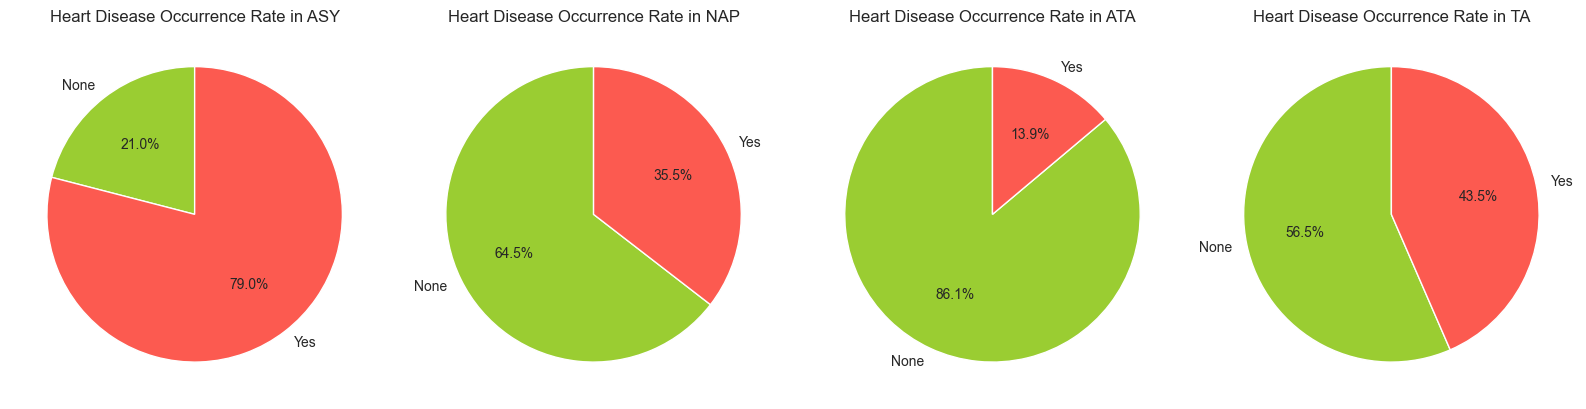

In [9]:
# r5
plt.figure(figsize=(10,6))
sns.countplot(x='ChestPainType', hue='HeartDisease', data=heartDS, palette='Accent', order=['ASY','NAP','ATA','TA'])
plt.title('Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

# also separating to pie charts to better view individually
cp_heart_counts = heartDS.groupby(['ChestPainType', 'HeartDisease']).size().unstack()
chest_pain_types = ['ASY', 'NAP', 'ATA', 'TA']
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
labels = ['None', 'Yes']
colors = ['#9ACD32', '#FC5A50']
#loop to make pie for each pain type
for i, cp_type in enumerate(chest_pain_types):
    axes[i].pie(cp_heart_counts.loc[cp_type], labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
    axes[i].set_title(f"Heart Disease Occurrence Rate in {cp_type}")
plt.tight_layout()
plt.show()

### R6

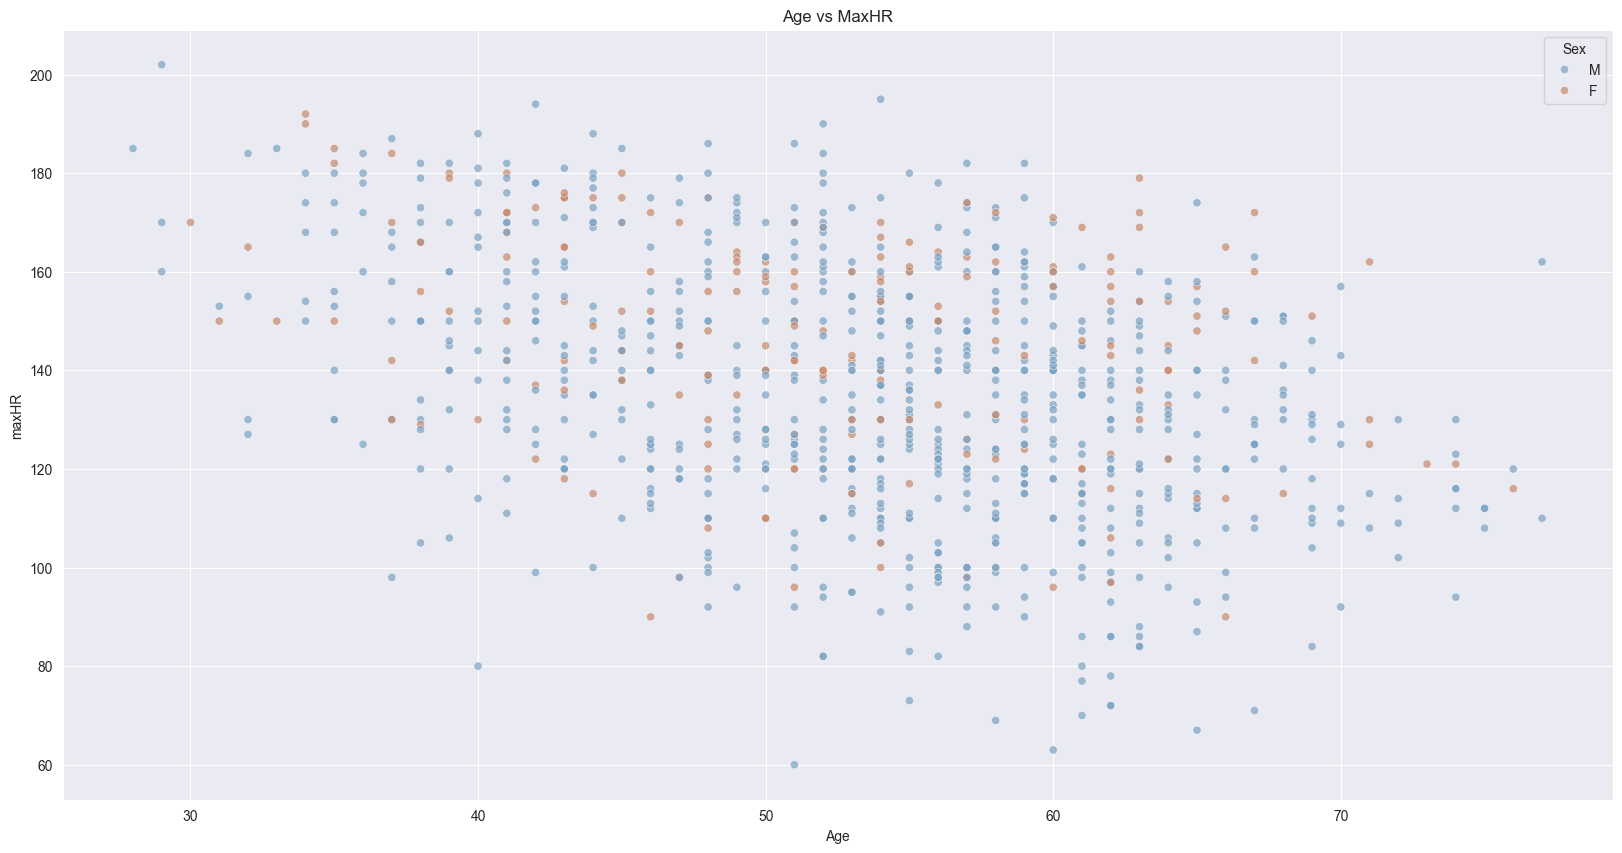

In [10]:
# r6
plt.figure(figsize=(20,10))
sns.scatterplot(x='Age', y='MaxHR', hue='Sex', palette="twilight_shifted" ,data=heartDS, alpha=0.7)
plt.title('Age vs MaxHR')
plt.xlabel('Age')
plt.ylabel('maxHR')
plt.show()

### R7

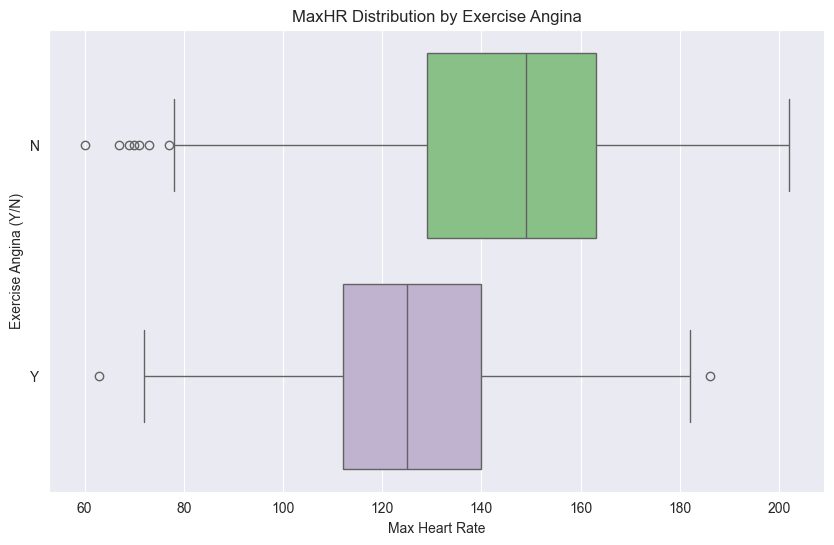

In [11]:
# r7
plt.figure(figsize=(10,6))
sns.boxplot(y='ExerciseAngina', x='MaxHR', data=heartDS, hue='ExerciseAngina', palette='Accent')
plt.title('MaxHR Distribution by Exercise Angina')
plt.xlabel('Max Heart Rate')
plt.ylabel('Exercise Angina (Y/N)')
plt.show()

### EA1

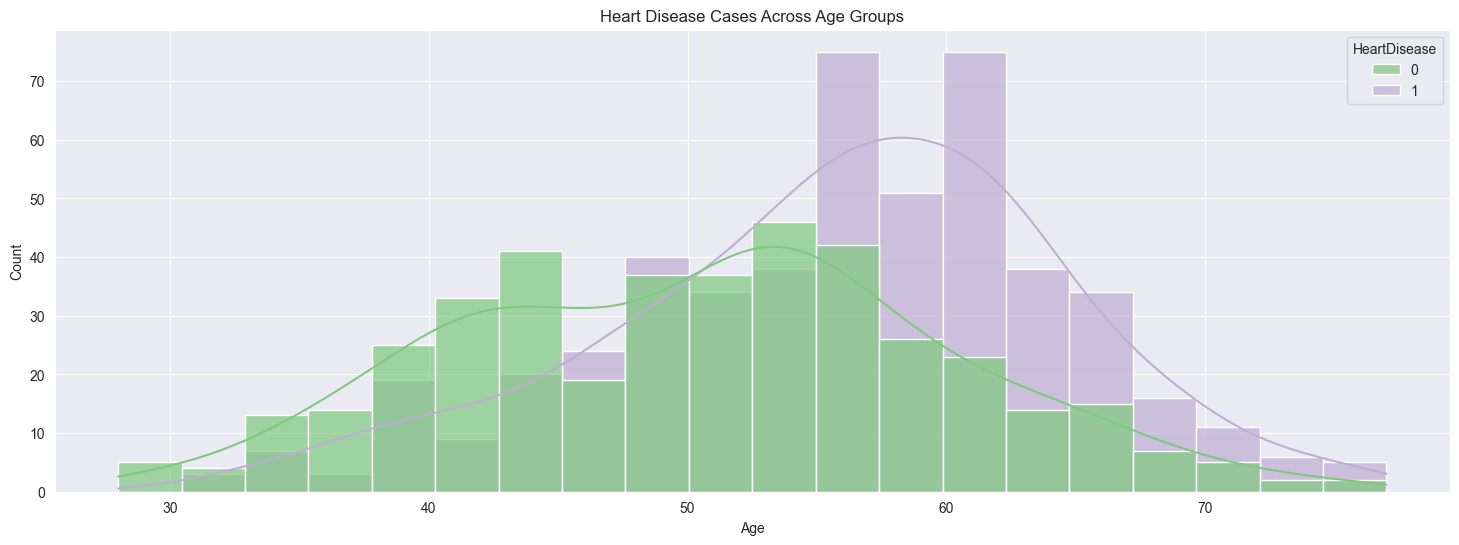

In [12]:
# ea1 (extra analysis)
plt.figure(figsize=(18,6))
sns.histplot(data=heartDS, x='Age', hue='HeartDisease', bins=20, kde=True, palette='Accent', alpha=0.7)
plt.title('Heart Disease Cases Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### EA2

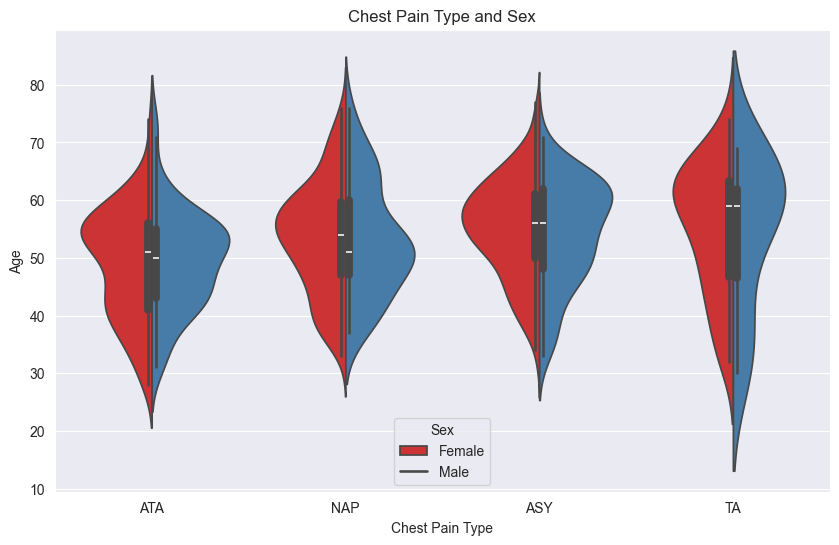

In [13]:
# ea2
plt.figure(figsize=(10,6))
sns.violinplot(x='ChestPainType', y='Age', hue='Sex', data=heartDS, split=True, palette='Set1')
plt.title('Chest Pain Type and Sex')
# plt.xlabel('HeartDisease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Age')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()

### EA3

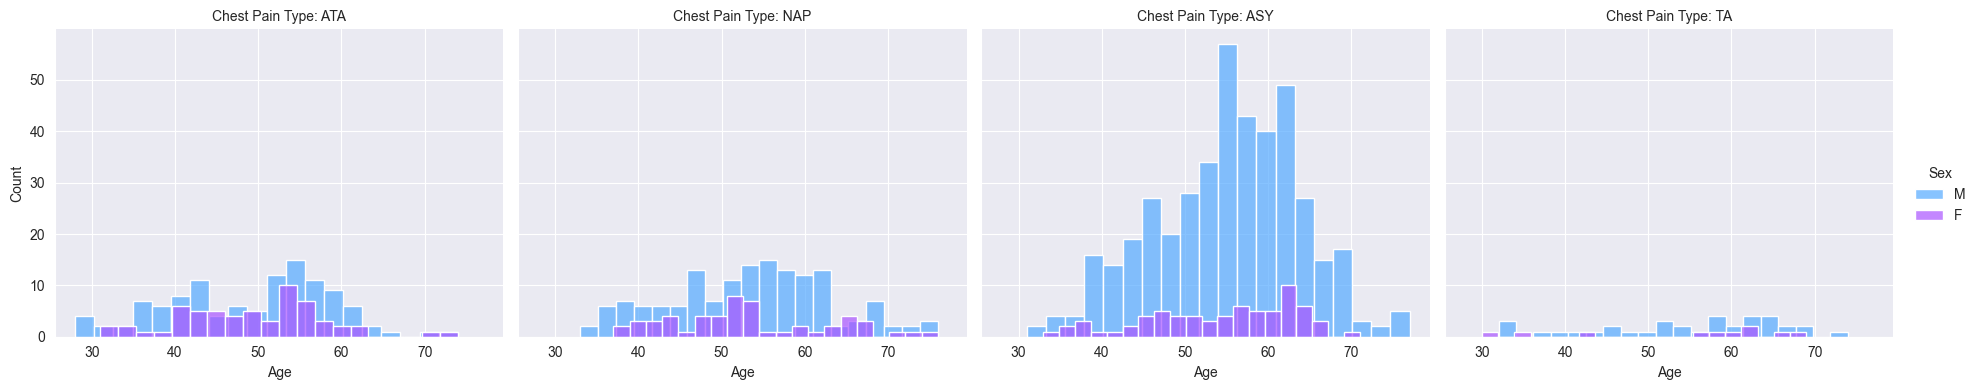

In [14]:
# ea3
graphs = sns.FacetGrid(heartDS, col="ChestPainType", hue="Sex", height=4, aspect=1.2, palette='cool')
graphs.map(sns.histplot, "Age", alpha=0.7, bins=20)
graphs.add_legend(title="Sex")
graphs.set_axis_labels("Age", "Count")
graphs.set_titles("Chest Pain Type: {col_name}")
plt.show()

# 4. Insights

- 1 - Age Distribution:
    - a: The majority of patients visiting for heart related problems would be around in their 50s and 60s, with the peak around the mid-50s.  
    - b: The distribution follows a right skewed pattern in 'Age', which indicates the frequency of doctor visits are higher in the 50-60 age groups and that a younger individual is less likely to visit for a heart complaint.  
    - c: An univariate analysis was done using a historgam to visualize the distribution of age.  
    - d: Please check the part for r1.  
  
- 2 - Gender Distribution:  
    - a: Males are 3.5 times more likely than Females to visit a doctor's office for a heart problem.  
    - b: The distribution of genders show that there were 3.5 times more Male patients recorded than of Females, indicating that males were 3.5 times more recorded as heart-related patients according the records.  
    - c: A categorical count analysis was done using a bar plot.   
    - d: Please check the part for r2.  
  
- 3 - Chest Pain Type Distribution:  
    - a: The most common chest pain type diagnosed is ASY(Asmptomatic), making a significantly higher frequency above %50 of all the symptoms recorded.  
    - b: Checking the Chest Pain Type Distributions gives the results showing that of all the chest pain types ocurred, the ASY has been recorded more than the three other types combined.  
    - c: A categorical frequency analysis was done using a countplot to visualize chest pain frequencies.  
    - d: Please check the part for r3.      

- 4 - Heart Disease Occurrence by Gender:  
    - a: Males are more likely to have a heart condition than Females according the data.  
    - b: The countplot of Heart Disease Occurrences by gender showed a higher total occurrence and frequency in Males than Females and additionally, the pie charts revealed that about %63 of the Male patients had a heart disease while only the %25 of the Females were recorded also with a heart disease.  
    - c: A bivariate analysis was done using a countplot and pie charts to compare the occurrences between heart diseases by the two genders and the proportions within the genders.  
    - d: Please see the r4 results.  

- 5 - Chest Pain Type and Heart Disease Probability:  
    - a: A patient with ASY symptoms is %79 likely to experience heart disease.  
    - b: The countplot of "Heart Disease by Chest Pain Type" shows that 'ASY' is the most common chest pain type, and the pie charts indicate that %79 of the ASY cases are linked to a heart disease.  
    - c: A categorical frequency analysis and a pie chart analysis was done to determine the proportion and occurrence possibility of disease cases within each category.  
    - d: Please see the r5 results.  
  
- 6 - Chest Pain Type and Heart Disease Probability:  
    - a: A patient with ATA diagnosis is ~%86 likely to be in healthy condition.  
    - b: The countplot of Heart Disease by Chest Pain Type shows that the 'ATA' were associated significantly less to a heart disease than of the others and the corresponding pie chart showed that %86 of the time the patients with ATA chest pain did not have any heart diseases.  
    - c: A categorical frequency analysis and a pie chart analysis was done to determine the proportion and occurrence possibility of disease cases within each category.  
    - d: Please see the r5 results.  
  
- 7 - Chest Pain Type and Heart Disease Probability:  
    - a: As a patient gets older, their maximum heart rate achieved decreases.  
    - b: The Scatterplot of the 'age' and 'maxHR' coloured by the gender shows a trend that is downward as the patient gets older on their maximum heart rate. The younger maxHR values average higher while the average value drecreases as the patient age increases.  
    - c: A scatterplot analysis was used to examine the correlation between Age and MaxHR.  
    - d: Please see the part for r6.  
  
- 8 - Exercise-Angina and Maximum Heart Rate:  
    - a: Patients that experience Exercise-Angina tend to have lower Maximum Heart Rates acquired than of those not experiencing exercise angina.  
    - b: The boxplot analysis shows that individuals who have the Exercise-Angina condition have a generally lower median of Maximum Heart Rate than those who don't.  
    - c: A boxplot analysis of the MaxHR and ExerciseAngina was done for this insight.  
    - d: Please see the results of r7.  
  
- 9 - Age and Heart Disease Association:  
    - a: Older people have a higher risk of having a heart disease than younger individuals.  
    - b: The histplot analysis shows that individuals belonging to older age groups have a greater risk of having a heart disease than of the younger individuals, especially peaking at the age group of 60 where the occurrence of heart disease is significantly greater than of all lower age groups.  
    - c: A histplot analysis on the 'age' and 'hear disease' was done for this insight.  
    - d: Please check the part for ea1.  
  
- 10 - Chest Pain Probability Across Ages and Genders:  
    - a: Males experince Chest Pain Types across all four of the ATA, NAP, ASY, and TA chest pain types in greater numbers of the population than Females, and are greatly at risk of being patients for the ASY type.  
    - b: The pie charts, violin charts, and facetgrids show that the majority of the data was recorded for Male patients for all 4 chest pain types in which the ASY type has significantly greater amount of patients than Females across the different age groups.  
    - c: A combination of pie charts, violin charts, and facet grids were done for this insight.  
    - d: Please see the results of r4, ea2, and ea3.  



5. Conclusion 

The goal of this analysis was to explore the Heart Failure Prediction Dataset to undercover some of the key patterns related with the data provided of the patients across genders, age groups, heart disease occurrence, and different chest pain types. The insights are aimed to provide valuable information for professionals and researchers in the cardiology related medical fields.  
Throughout a series of different analyses, several important insights were reached;   
- Heart related medical visits are most common in the age groups in their 50s-60s, and noticeably increasing as the individuals get older, seeing it's peak at 60 years olds,
- Male individuals are about 3.5 times more likely to visit a doctor for heart related concerns and also are at higher risk for developing heart diseases than Females,
- The ASY(Asymptomatic) is the most frequent type of chest pain type and is the most strongly associated type with a heart disease at a %79 rate, whereas ATA(Atypical Angina) was vice versa as %86 of the time weren't related to a heart disease,
- Across different age groups and chest pain types across genders, Male patients are at greater risk for all recorded chest pain types, especially ASY(Asymptomatic), which aligned with the highest occurrence of heart diseases linked.

These insights show the importance on specific features in heart disease prevention which could help professionals in the field tailor diagnostic approaches and prioritize early screenings for at risk patients. 


6. References  
- https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction  
- https://matplotlib.org/stable/users/explain/colors/colors.html  
- https://seaborn.pydata.org/tutorial.html  
- https://matplotlib.org/stable/tutorials/index  
- https://medium.com/datarunner/veri-biliminde-normal-da%C4%9F%C4%B1l%C4%B1m%C4%B1n-python-%C3%BCzerinden-g%C3%B6rselle%C5%9Ftirilmesi-ve-yorumlanmas%C4%B1-histogram-8381d12b85b9  
- https://www.atlassian.com/data/charts/histogram-complete-guide  
- https://seaborn.pydata.org/examples/index.html  
